# Investigating TMDB movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Business Problem and questions to be answered

<ul>
<li> what are top genres generating profits? </li>

<li> what are top 3 most popular movies? </li>
                
<li> what was the average revenue of the each genres ? </li>
                
<li> how much difference does the budget and adjusted budget had ? </li>
</ul>

In [1]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#### creating a function called title_lables to make it easy when doing the plots and calling the function 
def title_lables (title:str, xlabel:str, ylabel:str):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### loading our dataset and investigating the first five rows 

In [ ]:
df = pd.read_csv("data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#checking data types and overall non-null stats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking df shape to find number of rows and cols 

df.shape

(10866, 21)

In [6]:
#checking data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#checking the statistic 
df.describe(include=['int64', 'float64'])

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [8]:
#checking nulls 
df_null = df.isnull().sum()
df_null

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### dropping columns with significant null values
from checking nulls found that home page and tagline has significant number of rows null #dropping missing values #since homepage and tagline has so many null values we will drop them

In [9]:
cols_to_drop = ['homepage','tagline']

df = df.drop(columns = cols_to_drop)

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [10]:
#double checking the nulls 
df_null = df.isnull().sum()
df_null


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

after chekcing null value found genres and director two important row has certain values as null 

so we fill genres and director with unknown value

In [11]:
#after chekcing null value found genres and director two important row has certain values as null 
#fill genres and director with unknown value

df['director'].fillna('Unknown',inplace=True)
df['genres'].fillna('Unknown',inplace=True)

C:\Users\jawid\AppData\Local\Temp\ipykernel_17936\4108585887.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown',inplace=True)
C:\Users\jawid\AppData\Local\Temp\ipykernel_17936\4108585887.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [12]:
#fill overview and keywords with empty string ""

df['overview'].fillna("",inplace=True)
df['keywords'].fillna("",inplace=True)

C:\Users\jawid\AppData\Local\Temp\ipykernel_17936\3881609585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna("",inplace=True)
C:\Users\jawid\AppData\Local\Temp\ipykernel_17936\3881609585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [13]:
#checking the nulls 
df_null = df.isnull().sum()
df_null


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                   0
keywords                   0
overview                   0
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
#checking zero values in budget revenue and runtime
cols_to_check = ['budget', 'revenue', 'runtime']
print((df[cols_to_check] == 0).sum())

budget     5696
revenue    6016
runtime      31
dtype: int64


In [15]:
#handling zeros filling zeros with nan

df['budget'] = df['budget'].replace(0,np.nan)
df['revenue'] = df['revenue'].replace(0,np.nan)

In [16]:
#handling zero in runtime and filling nan with median
df['runtime'] = df['runtime'].replace(0,np.nan)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [17]:
#double checking zero values
cols_to_check = ['budget', 'revenue', 'runtime']
print((df[cols_to_check] == 0).sum())

budget     0
revenue    0
runtime    0
dtype: int64


In [18]:
df_null = df.isnull().sum()
df_null

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                   0
keywords                   0
overview                   0
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
#checking number of duplicates 
df_duplicates = df.duplicated().sum()
print(df_duplicates)

1


In [20]:
#dropping duplicates 
df = df.drop_duplicates()


In [21]:
#cleaning geners , cast and changing date from object to date 

df['release_date'] = pd.to_datetime(df['release_date'])
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')

C:\Users\jawid\AppData\Local\Temp\ipykernel_17936\2619501309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


### since there is thousnads of rows with nan value in budget in order to have meaningfull finance reuslt we create and subset for our financce 

In [22]:
df_finance = df.dropna(subset=['budget','revenue']).copy()
#we using copy to tell panda that thsi dataframe is independant of original DF
df_finance.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [23]:
#calculating the profit 
df_finance['profit'] = df_finance['revenue_adj'] - df_finance['budget']

In [24]:
#checking if profit columns is created
df_finance.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.242446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1.981613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.616190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.702723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.195749e+09


## Exploratory Data Analysis
now that the data is claned we need to answer to the business questions below
### Research Questions : 

                    what are top genres generating profits?
                    
                    what are top 3 most popular movies?
                    
                    what movie had the highest budget of all the time?
                    
                    what was the average revenue of the each genres ?
                    
                    how much difference does the budget and adjusted budget had ? 

In [25]:
df_finance['genres'] = df_finance['genres'].apply(
    lambda x: x.split('|') if isinstance(x, str) else x
)


In [26]:
df_finance['profit'].isna().sum()
len(df_finance)


3854

In [27]:
df_finance['budget'] = pd.to_numeric(df_finance['budget'], errors='coerce')



In [28]:
#find most profitalbe genre

#what are top genres generating profits?
genre_profit = df_finance.explode('genres')

#find average profit
top_genres = genre_profit.groupby('genres')['profit'].mean()
top_genres

genres
Action             1.389475e+08
Adventure          2.014686e+08
Animation          2.140209e+08
Comedy             8.819947e+07
Crime              7.735939e+07
Documentary        1.995319e+07
Drama              7.332608e+07
Family             1.813119e+08
Fantasy            1.792754e+08
Foreign            3.303109e+06
History            8.095651e+07
Horror             6.284025e+07
Music              1.087840e+08
Mystery            7.855729e+07
Romance            8.624451e+07
Science Fiction    1.461663e+08
TV Movie           5.338910e+07
Thriller           9.087629e+07
War                1.136423e+08
Western            8.283988e+07
Name: profit, dtype: float64

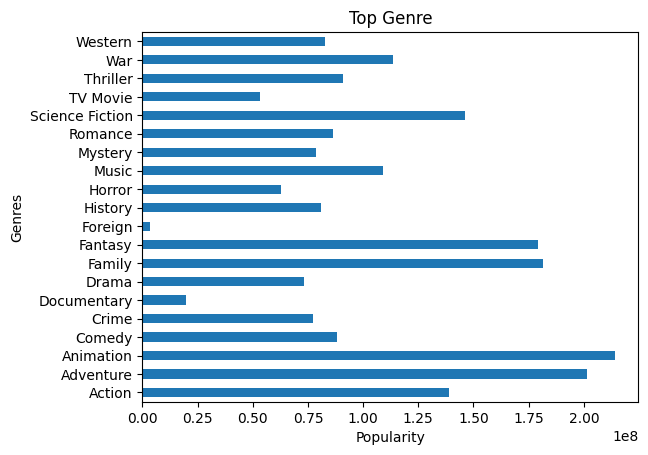

In [29]:
top_genres.plot(kind="barh")

title_lables("Top Genre","Popularity","Genres")

In [30]:
#   which gerene has the lower production cost  ?
genre_cost = df_finance.explode('genres')

#find lowest budget
low_cost = genre_cost.groupby('genres')['budget_adj'].mean().sort_values(ascending=False)
low_cost


genres
Animation          8.347215e+07
Adventure          8.125573e+07
Fantasy            8.023752e+07
Family             7.110099e+07
Western            6.719107e+07
Action             6.644262e+07
Science Fiction    6.561722e+07
War                5.727295e+07
History            5.687985e+07
Thriller           4.460177e+07
Mystery            4.236264e+07
Crime              3.991007e+07
Comedy             3.917646e+07
Music              3.519802e+07
Drama              3.471246e+07
Romance            3.390431e+07
Horror             2.324071e+07
Foreign            1.289824e+07
TV Movie           6.951084e+06
Documentary        5.379702e+06
Name: budget_adj, dtype: float64

In [31]:
#what are top 3 most popular movies?

df_top_movies = df.nlargest(3,'popularity')
df_top_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,"[Matthew McConaughey, Jessica Chastain, Anne H...",Christopher Nolan,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169.0,"[Adventure, Drama, Science Fiction]",Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08


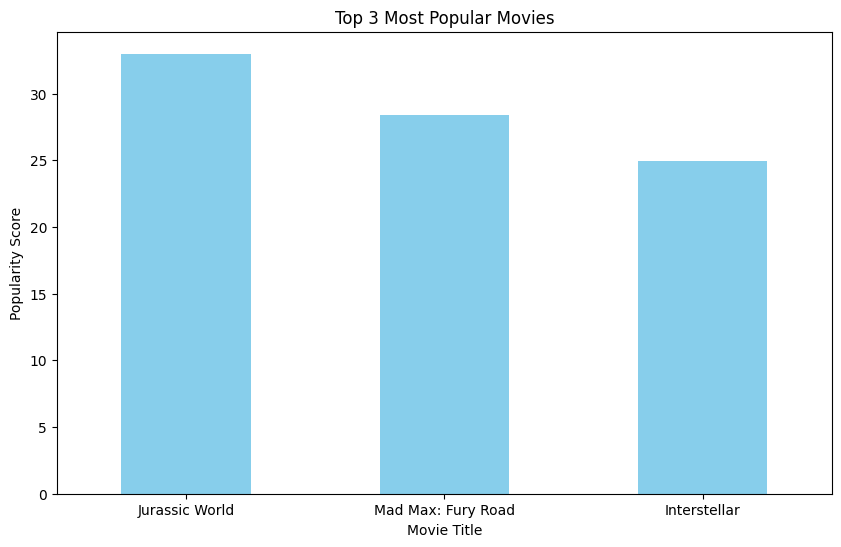

In [32]:

#plotting top 3 movies 
ax = df_top_movies.set_index('original_title')['popularity'].plot(
    kind='bar', 
    figsize=(10, 6), 
    color='skyblue', 
    rot=0  
)

#adding title using the function 
title_lables("Top 3 Most Popular Movies","Movie Title","Popularity Score")
# plt.title('Top 3 Most Popular Movies', fontsize=16)
# plt.ylabel('Popularity Score', fontsize=12)
# plt.xlabel('Movie Title', fontsize=12)



# plt.tight_layout()

In [33]:
#    what movie had the highest budget of all the time?

df_most_exp_movie = df.loc[df['budget_adj'].idxmax()]
df_most_exp_movie

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                        425000000.0
revenue                                                        11087569.0
original_title                                          The Warrior's Way
cast                    [Kate Bosworth, Jang Dong-gun, Geoffrey Rush, ...
director                                                       Sngmoo Lee
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                             100.0
genres                    [Adventure, Fantasy, Action, Western, Thriller]
production_companies                             Boram Entertainment Inc.
release_date                          

In [34]:
#      how much difference does the budget and adjusted budget had ? 
yearly_budgets = df.groupby('release_year')[['budget', 'budget_adj']].mean()
yearly_budgets


,budget,budget_adj
release_year,,
1960,2.450772e+06,5.082036e+06
1961,3.549000e+06,1.085687e+07
1962,3.908723e+06,1.232693e+07
1963,6.666500e+06,1.535687e+07
1964,3.589378e+06,6.608980e+06
1965,6.382283e+06,1.388168e+07
1966,4.796233e+06,8.405522e+06
1967,5.591789e+06,1.644849e+07
1968,4.795933e+06,1.156367e+07


<Axes: xlabel='release_year'>

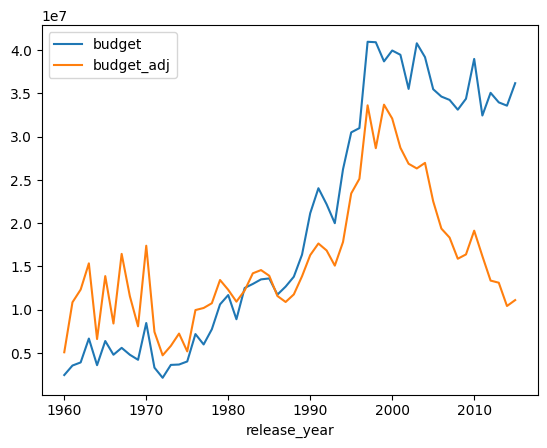

In [35]:
yearly_budgets.plot()

### check the relation between budget and rating 


<Axes: title={'center': 'relation between budget and rating '}, xlabel='budget', ylabel='vote_average'>

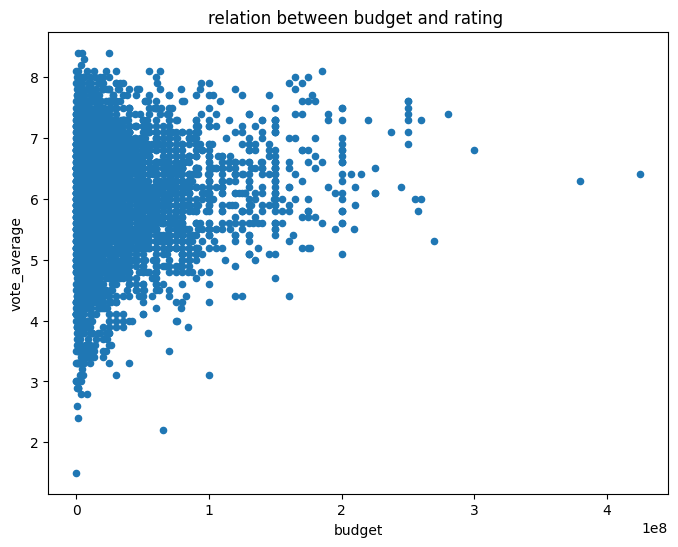

In [36]:
df.plot.scatter(x="budget",y="vote_average", figsize=(8, 6),title="relation between budget and rating ")

### checking relation between budget , revenue and color dotting it based on year of release 

<Axes: xlabel='budget_adj', ylabel='revenue_adj'>

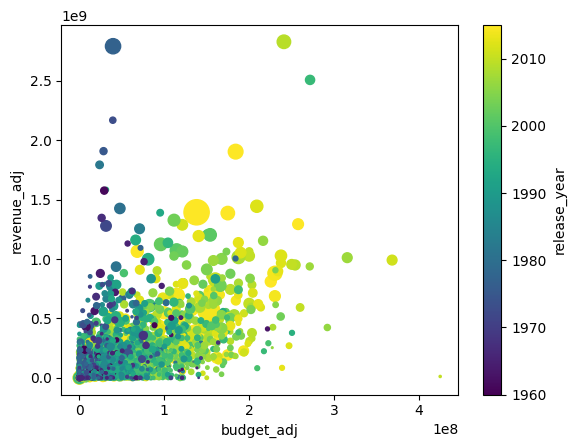

In [37]:
df.plot.scatter(x='budget_adj', y='revenue_adj', s=df['popularity']*10, c='release_year', colormap='viridis')

<Axes: xlabel='budget_adj', ylabel='profit'>

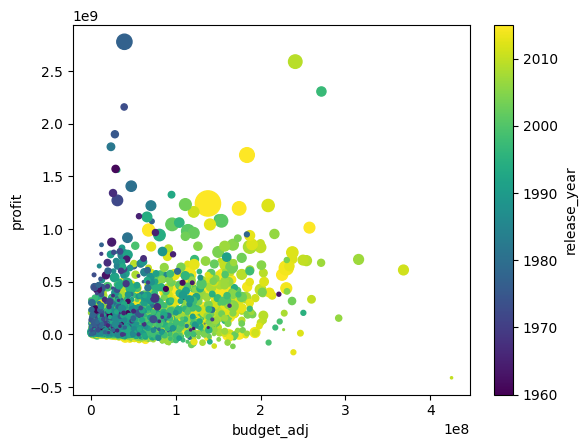

In [38]:
df_finance.plot.scatter(x='budget_adj', y='profit', s=df_finance['popularity']*10, c='release_year', colormap='viridis')

<Axes: ylabel='Frequency'>

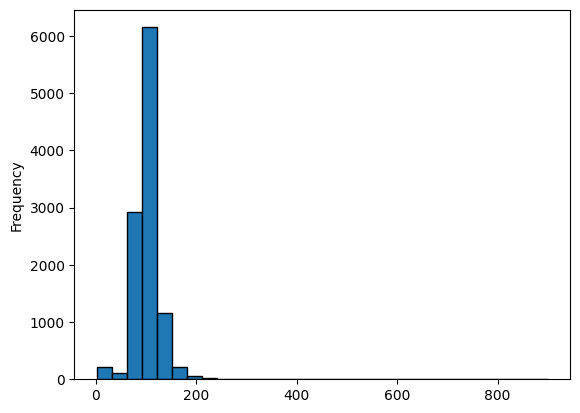

In [39]:
df['runtime'].plot(kind='hist', bins=30, edgecolor='black')

<Axes: ylabel='Frequency'>

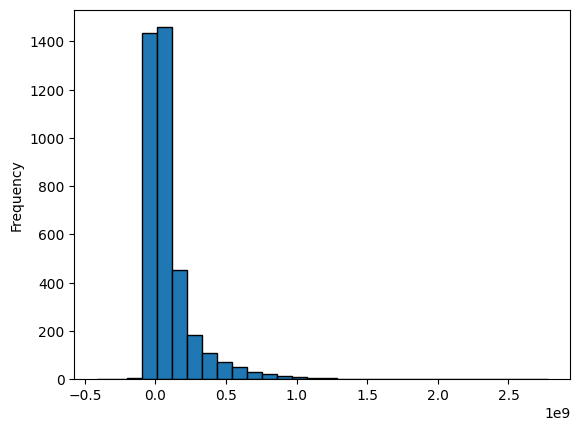

In [40]:
df_finance['profit'].plot(kind='hist', bins=30, edgecolor='black')

<Axes: ylabel='Frequency'>

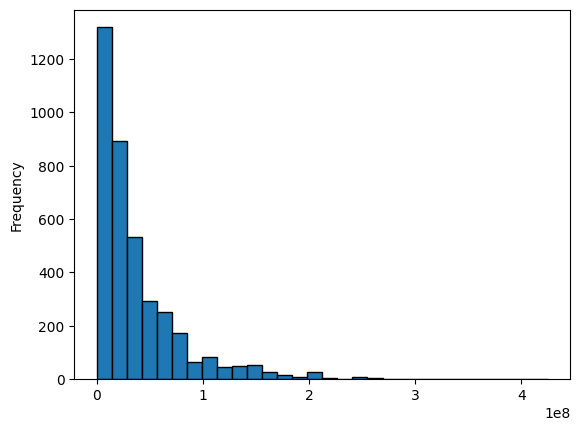

In [41]:
df_finance['budget'].plot(kind='hist', bins=30, edgecolor='black')

In [42]:
columns_corr = df_finance[['popularity','budget_adj','revenue_adj','profit']].corr()
columns_corr
# df_finance.corr(numeric_only=True)

,popularity,budget_adj,revenue_adj,profit
popularity,1.000000,0.399356,0.546959,0.504617
budget_adj,0.399356,1.000000,0.570451,0.420728
revenue_adj,0.546959,0.570451,1.000000,0.983419
profit,0.504617,0.420728,0.983419,1.000000


# Conclusion
        
 what are top genres generating profits?      
 
in our investigation it was found that Animation, Adventure and Family was the top 3 genres based on profit. however the top 3 genre in term of lower cost were Adventure and Family and Fantasy genres showing us that having a low cost always does not mean high profit, inspite of this, in most cases the lower cost of production mean the higher return.
 
what are top 3 most popular movies?
for top 3 movies in our dataset were in term of popularity were Jurassic World, 
Mad Max: Fury Road and Interstellar respectively. however , in getting profit top 3 movies were Star Wars,Avatar and Titanic. we understand that being a popular movie does not translate to higher profit.


what was the average revenue of the each genres ?
our analysis found that Animation and Adenvture are generating highest reveune wigh average of over $271M. in contrast documantry and foreign movies generated the lowest revenue suggesting that family friendly content and adventure content are genrese people are showing a lot of interests.

how much difference does the budget and adjusted budget had ? 
the comparsion between actual budget and adjusted budget due to inflation shows there is significant difference between the nominal and actual cost of the production. despite the mean for the budget was $19M , the adjusted cost reduced to 15M due to inflation. in calculations later done we have used the adjusted budget to get unbiased result. 

we have used correlation to check the reltionship between popularity, adjusted budget , adjusted revenue and profit.The correlation analsysis show a fundemantally strong relationship between adjusted revenue and profit, it shows as the revenue increse in most cases the profit increase as well.  the relationship between popularity and revenue is moderate, we learned that popularity can be a factor in revenue but we cannot always conclude the more popular the film is the more the earning will be.

# Limitaions 
one of the big problem found was the zero problem that around 50% of the budget rows and significant portion of revenue had zero value. so this was impacting the overall financial reporting.specifically for the mean of profit the result can be quite overstated due to large number of empty rows. 

another issue was budget and adjusted budget difference and i had to use the adjusted budget for the analsysis to reflect a better understanding of the real value of the movies as per today value. 

in dataset most of the movies from Hollywood so the average profit , popularity and other metrics only reflects the American film industry and it does not reflect the overall global film industry result. additiionally , the short films which are produced with very low budget is not listed in the dataset which could possibly affect the result of our findings.





In [43]:
df_finance.to_csv("data/tmdb_finance_clean.csv", index=False)
